In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv('/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/df.csv')
df_session=pd.read_csv('/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/session_pre.csv')



In [2]:
df_session.isnull().sum()

Unnamed: 0       0
user_id          0
action           0
device_type      0
secs_elapsed     0
action_type      0
action_detail    0
dtype: int64

In [3]:
df_session=df_session.drop(['Unnamed: 0'],axis=1)

In [4]:
df=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'tfa_date', 'duration',
       'cat_duration'],
      dtype='object')

In [6]:
df_session.rename(columns={"user_id":"id"},inplace=True)

In [7]:
df_session.columns

Index(['id', 'action', 'device_type', 'secs_elapsed', 'action_type',
       'action_detail'],
      dtype='object')

In [8]:
merge_left = pd.merge(df_session,df, how='left', left_on='id', right_on='id')

In [9]:
merge_left.head()

,id,action,device_type,secs_elapsed,action_type,action_detail,date_account_created,timestamp_first_active,date_first_booking,gender,...,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,tfa_date,duration,cat_duration
0,d1mm9tcy42,search_results,Windows Desktop,24,click,view_search_results,2014-01-01,2.014010e+13,2014-01-04,MALE,...,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,2014-01-01,3.0,F
1,d1mm9tcy42,search_results,Windows Desktop,24,click,view_search_results,2014-01-01,2.014010e+13,2014-01-04,MALE,...,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,2014-01-01,3.0,F
2,d1mm9tcy42,search_results,Windows Desktop,24,click,view_search_results,2014-01-01,2.014010e+13,2014-01-04,MALE,...,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,2014-01-01,3.0,F
3,d1mm9tcy42,personalize,Windows Desktop,24,data,wishlist_content_update,2014-01-01,2.014010e+13,2014-01-04,MALE,...,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,2014-01-01,3.0,F
4,d1mm9tcy42,index,Windows Desktop,24,view,view_search_results,2014-01-01,2.014010e+13,2014-01-04,MALE,...,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,2014-01-01,3.0,F


In [10]:
merge_left.isnull().sum()

id                               0
action                           0
device_type                      0
secs_elapsed                     0
action_type                      0
action_detail                    0
date_account_created       7902887
timestamp_first_active     7902887
date_first_booking         7902887
gender                     7902887
age                        7902887
signup_method              7902887
signup_flow                7902887
language                   7902887
affiliate_channel          7902887
affiliate_provider         7902887
first_affiliate_tracked    7902887
signup_app                 7902887
first_device_type          7902887
first_browser              7902887
country_destination        7902887
tfa_date                   7902887
duration                   7902887
cat_duration               7902887
dtype: int64

In [11]:
merge_left=merge_left.dropna()

In [12]:
merge_left.isnull().sum()

id                         0
action                     0
device_type                0
secs_elapsed               0
action_type                0
action_detail              0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
tfa_date                   0
duration                   0
cat_duration               0
dtype: int64

In [13]:
merge_left.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            5335160, 5335161, 5335162, 5335163, 5335164, 5335165, 5335166,
            5335167, 5335168, 5335169],
           dtype='int64', length=2383249)

In [14]:
is_s=merge_left['cat_duration']=='S'
is_f=merge_left['cat_duration']=='F'

In [15]:
subset_s = merge_left[is_s]
subset_f = merge_left[is_f]

In [16]:
# 어떠한 detail action을 사용할지 결정 

subset_s1= pd.DataFrame(subset_s.action_detail.value_counts(sort=True))
subset_f1= pd.DataFrame(subset_f.action_detail.value_counts(sort=True))



In [17]:
subset_s

,id,action,device_type,secs_elapsed,action_type,action_detail,date_account_created,timestamp_first_active,date_first_booking,gender,...,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,tfa_date,duration,cat_duration
272,xwxei6hdk4,dashboard,iPhone,24,view,dashboard,2014-01-01,2.014010e+13,2014-01-07,FEMALE,...,seo,google,linked,Web,iPad,Mobile Safari,US,2014-01-01,6.0,S
273,xwxei6hdk4,header_userpic,iPhone,24,data,header_userpic,2014-01-01,2.014010e+13,2014-01-07,FEMALE,...,seo,google,linked,Web,iPad,Mobile Safari,US,2014-01-01,6.0,S
274,xwxei6hdk4,message,iPad Tablet,24,message_post,message_post,2014-01-01,2.014010e+13,2014-01-07,FEMALE,...,seo,google,linked,Web,iPad,Mobile Safari,US,2014-01-01,6.0,S
275,xwxei6hdk4,ask_question,iPad Tablet,24,submit,contact_host,2014-01-01,2.014010e+13,2014-01-07,FEMALE,...,seo,google,linked,Web,iPad,Mobile Safari,US,2014-01-01,6.0,S
276,xwxei6hdk4,ask_question,iPad Tablet,24,submit,contact_host,2014-01-01,2.014010e+13,2014-01-07,FEMALE,...,seo,google,linked,Web,iPad,Mobile Safari,US,2014-01-01,6.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335051,0k26r3mir0,ajax_refresh_subtotal,Mac Desktop,24,click,change_trip_characteristics,2014-06-30,2.014063e+13,2014-07-13,FEMALE,...,sem-brand,google,linked,Web,Mac Desktop,Safari,US,2014-06-30,13.0,S
5335052,0k26r3mir0,show,Mac Desktop,24,view,p3,2014-06-30,2.014063e+13,2014-07-13,FEMALE,...,sem-brand,google,linked,Web,Mac Desktop,Safari,US,2014-06-30,13.0,S
5335053,0k26r3mir0,personalize,Mac Desktop,24,data,wishlist_content_update,2014-06-30,2.014063e+13,2014-07-13,FEMALE,...,sem-brand,google,linked,Web,Mac Desktop,Safari,US,2014-06-30,13.0,S
5335054,0k26r3mir0,index,Mac Desktop,24,view,view_search_results,2014-06-30,2.014063e+13,2014-07-13,FEMALE,...,sem-brand,google,linked,Web,Mac Desktop,Safari,US,2014-06-30,13.0,S


In [18]:
list_s=subset_s1.head(50).index

In [19]:
list_f=subset_f1.head(50).index

In [20]:
#중복된거 뺀다.
re_s=list_s.difference(list_f)

In [21]:
#중복된거 뺀다. 
re_f=list_f.difference(list_s)

In [22]:
#action_detail top 50개중 Slow 그룹이 주로 하는 detail들이다 .
re_s

Index(['create_listing', 'list_your_space', 'listing_recommendations',
       'manage_listing', 'signup', 'update_listing_description', 'wishlist'],
      dtype='object')

In [23]:
# action_detail top 50개중 Fast 그룹이 주로 하는 detail들이다 .
# 결론적으로 fast 사람과 slow 사람이 주로 하는 행동의 차이점을 알수 있다. 
re_f

Index(['apply_coupon', 'message_to_host_change', 'message_to_host_focus', 'p4',
       'pending', 'post_checkout_action', 'request_new_confirm_email'],
      dtype='object')

In [24]:
subset_s1['action_detail'].dtype

dtype('int64')

In [25]:
#각 그룹 별 유의한 차이의 횟수를 가진 행동들에 대한 선별

mean_s=subset_s1['action_detail'].values.mean()

In [26]:
mean_f=subset_f1['action_detail'].values.mean()

In [27]:
subset_s1['average_divide']=0


In [28]:
mean_s

9181.453781512606

In [29]:
subset_f1['average_divide']=0


In [30]:
subset_s1=subset_s1.astype({'action_detail':'float'})
subset_f1=subset_f1.astype({'action_detail':'float'})



In [31]:
subset_s1['average_divide']=subset_s1['action_detail']/mean_s
subset_f1['average_divide']=subset_f1['action_detail']/mean_f


In [32]:
sub=subset_s1-subset_f1

In [33]:
sub

,action_detail,average_divide
-unknown-,-78858.0,-6.267087
account_notification_settings,-1597.0,-0.130846
account_payout_preferences,68.0,0.012311
account_privacy_settings,-66.0,-0.004980
account_transaction_history,-140.0,-0.011691
...,...,...
wishlist_content_update,2990.0,1.664654
wishlist_note,125.0,0.015155
your_listings,1111.0,0.149677
your_reservations,11.0,0.002046


In [34]:
sub.loc[(sub.average_divide<1) & (sub.average_divide>-1), 'average_divide'] = np.nan
sub.dropna(subset=['average_divide'],inplace=True)


In [35]:
sub

,action_detail,average_divide
-unknown-,-78858.0,-6.267087
message_post,-12443.0,-1.068334
message_thread,-23584.0,-2.108405
p3,6309.0,3.338768
p5,-20321.0,-1.926176
update_listing,24864.0,2.835403
view_search_results,13279.0,3.892146
wishlist_content_update,2990.0,1.664654


In [36]:
detail_s=['p3','update_listing','view_search_result','wishlist_content_update']

In [37]:
detail_f=['-unknown-','message_post','message_thread']

In [38]:
subset_f1

,action_detail,average_divide
p3,206512.0,19.840676
view_search_results,190487.0,18.301072
-unknown-,180821.0,17.372409
wishlist_content_update,104283.0,10.019007
change_trip_characteristics,81287.0,7.809663
...,...,...
homepage,5.0,0.000480
place_worth,5.0,0.000480
delete_listing,3.0,0.000288
special_offer_field,1.0,0.000096


In [39]:
subset_s1.loc[subset_s1.average_divide <=0.5, 'average_divide'] = np.nan
subset_s1.dropna(subset=['average_divide'],inplace=True)


In [40]:
subset_f1.loc[subset_f1.average_divide <=0.5, 'average_divide'] = np.nan
subset_f1.dropna(subset=['average_divide'],inplace=True)


In [41]:
sel_s1=subset_s1.index

In [42]:
sel_f1=subset_f1.index

In [43]:
rem_s1=sel_s1.difference(sel_f1)

In [44]:
rem_f1=sel_f1.difference(sel_s1)

In [45]:
rem_s1

Index([], dtype='object')

In [46]:
rem_f1

Index(['cancellation_policies', 'create_phone_numbers', 'p1', 'p5', 'pending',
       'profile_verifications', 'update_user_profile', 'user_listings',
       'your_trips'],
      dtype='object')

In [47]:
# 선별 결과 행동 디테일의 결과가 이렇다 
final_S_detail=['p3','update_listing','view_search_result','wishlist_content_update']
final_F_detail=['cancellation_policies', 'create_phone_numbers', 'p1', 'p5', 'pending',
       'profile_verifications', 'update_user_profile', 'user_listings',
       'your_trips','message_post','message_thread']

In [48]:
# 총 웹 로그 활동 수 

sessions_new = pd.DataFrame(merge_left.id.value_counts(sort=False))
sessions_new['action_count'] = sessions_new.id
sessions_new['id'] = sessions_new.index
sessions_new = sessions_new.reset_index(drop=True)


sessions_new

,id,action_count
0,ai9pnmtx84,151
1,3q94qpmmfu,73
2,ygunjotnql,39
3,nyk4nvn099,34
4,01w22yhf78,390
...,...,...
28722,8fwnp1bprf,180
28723,f6glkfzgtc,71
28724,hws5tl6d3l,26
28725,9bpnagn0l9,433


In [60]:
merge_count = pd.merge(merge_left,sessions_new, how='left', left_on='id', right_on='id')

In [61]:
#action_count 개수가 5개 이하면 의미없는 데이터라고 판단 .
merge_count.loc[merge_count.action_count <5, 'action_count'] = np.nan
merge_count.dropna(subset=['action_count'],inplace=True)


In [62]:
merge_count

,id,action,device_type,secs_elapsed,action_type,action_detail,date_account_created,timestamp_first_active,date_first_booking,gender,...,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,tfa_date,duration,cat_duration,action_count
0,d1mm9tcy42,search_results,Windows Desktop,24,click,view_search_results,2014-01-01,2.014010e+13,2014-01-04,MALE,...,google,omg,Web,Windows Desktop,Chrome,other,2014-01-01,3.0,F,104.0
1,d1mm9tcy42,search_results,Windows Desktop,24,click,view_search_results,2014-01-01,2.014010e+13,2014-01-04,MALE,...,google,omg,Web,Windows Desktop,Chrome,other,2014-01-01,3.0,F,104.0
2,d1mm9tcy42,search_results,Windows Desktop,24,click,view_search_results,2014-01-01,2.014010e+13,2014-01-04,MALE,...,google,omg,Web,Windows Desktop,Chrome,other,2014-01-01,3.0,F,104.0
3,d1mm9tcy42,personalize,Windows Desktop,24,data,wishlist_content_update,2014-01-01,2.014010e+13,2014-01-04,MALE,...,google,omg,Web,Windows Desktop,Chrome,other,2014-01-01,3.0,F,104.0
4,d1mm9tcy42,index,Windows Desktop,24,view,view_search_results,2014-01-01,2.014010e+13,2014-01-04,MALE,...,google,omg,Web,Windows Desktop,Chrome,other,2014-01-01,3.0,F,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383244,qbxza0xojf,show,Windows Desktop,24,view,p1,2014-06-30,2.014063e+13,2014-07-02,FEMALE,...,google,omg,Web,Windows Desktop,IE,US,2014-06-30,2.0,F,99.0
2383245,qbxza0xojf,index,Windows Desktop,24,view,view_search_results,2014-06-30,2.014063e+13,2014-07-02,FEMALE,...,google,omg,Web,Windows Desktop,IE,US,2014-06-30,2.0,F,99.0
2383246,qbxza0xojf,header_userpic,Windows Desktop,24,data,header_userpic,2014-06-30,2.014063e+13,2014-07-02,FEMALE,...,google,omg,Web,Windows Desktop,IE,US,2014-06-30,2.0,F,99.0
2383247,qbxza0xojf,personalize,Windows Desktop,24,data,wishlist_content_update,2014-06-30,2.014063e+13,2014-07-02,FEMALE,...,google,omg,Web,Windows Desktop,IE,US,2014-06-30,2.0,F,99.0


In [63]:
# 타켓 밸류와 연관있는 칼럼 제거
merge_count=merge_count.drop(['timestamp_first_active','tfa_date','duration','date_account_created'] ,axis=1)



In [64]:
merge_count.columns

Index(['id', 'action', 'device_type', 'secs_elapsed', 'action_type',
       'action_detail', 'date_first_booking', 'gender', 'age', 'signup_method',
       'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'cat_duration', 'action_count'],
      dtype='object')

In [65]:
#target value means that tiem between booking and time first activity 
# so variables about signup are not considered 

merge_count=merge_count.drop(['signup_flow','signup_app','signup_method','date_first_booking'],axis=1)

In [66]:
# we focus on action_detail so action and action_type is not needed 
merge_count=merge_count.drop(['action','action_type'],axis=1)

In [67]:
# country 변수 추가

df_country=pd.read_csv("/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/countries.csv")



In [72]:
df_country.columns

Index(['country_destination', 'lat_destination', 'lng_destination',
       'distance_km', 'destination_km2', 'destination_language ',
       'language_levenshtein_distance'],
      dtype='object')

In [82]:
merge_c = pd.merge(merge_count,df_country, how='left', left_on='country_destination', right_on='country_destination')




In [83]:
merge_c=merge_c.drop(['lat_destination','lng_destination'],axis=1)

In [84]:
merge_c.isnull().sum()

id                                    0
device_type                           0
secs_elapsed                          0
action_detail                         0
gender                                0
age                                   0
language                              0
affiliate_channel                     0
affiliate_provider                    0
first_affiliate_tracked               0
first_device_type                     0
first_browser                         0
country_destination                   0
cat_duration                          0
action_count                          0
distance_km                      305839
destination_km2                  305839
destination_language             305839
language_levenshtein_distance    305839
dtype: int64

In [85]:
#결측치 제거 !! maybe other 지역 
merge_c=merge_c.dropna(axis=0)

In [86]:
merge_c=merge_c.drop(['language_levenshtein_distance'],axis=1)

In [87]:
merge_c

,id,device_type,secs_elapsed,action_detail,gender,age,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,first_device_type,first_browser,country_destination,cat_duration,action_count,distance_km,destination_km2,destination_language
104,4rvqpxoh3h,iPhone,24,-unknown-,FEMALE,36.048687,en,direct,direct,untracked,iPhone,-unknown-,GB,F,8.0,6883.659,243610.0,eng
105,4rvqpxoh3h,iPhone,24,-unknown-,FEMALE,36.048687,en,direct,direct,untracked,iPhone,-unknown-,GB,F,8.0,6883.659,243610.0,eng
106,4rvqpxoh3h,iPhone,24,-unknown-,FEMALE,36.048687,en,direct,direct,untracked,iPhone,-unknown-,GB,F,8.0,6883.659,243610.0,eng
107,4rvqpxoh3h,iPhone,24,-unknown-,FEMALE,36.048687,en,direct,direct,untracked,iPhone,-unknown-,GB,F,8.0,6883.659,243610.0,eng
108,4rvqpxoh3h,iPhone,24,-unknown-,FEMALE,36.048687,en,direct,direct,untracked,iPhone,-unknown-,GB,F,8.0,6883.659,243610.0,eng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378442,qbxza0xojf,Windows Desktop,24,p1,FEMALE,23.000000,en,sem-brand,google,omg,Windows Desktop,IE,US,F,99.0,0.000,9826675.0,eng
2378443,qbxza0xojf,Windows Desktop,24,view_search_results,FEMALE,23.000000,en,sem-brand,google,omg,Windows Desktop,IE,US,F,99.0,0.000,9826675.0,eng
2378444,qbxza0xojf,Windows Desktop,24,header_userpic,FEMALE,23.000000,en,sem-brand,google,omg,Windows Desktop,IE,US,F,99.0,0.000,9826675.0,eng
2378445,qbxza0xojf,Windows Desktop,24,wishlist_content_update,FEMALE,23.000000,en,sem-brand,google,omg,Windows Desktop,IE,US,F,99.0,0.000,9826675.0,eng


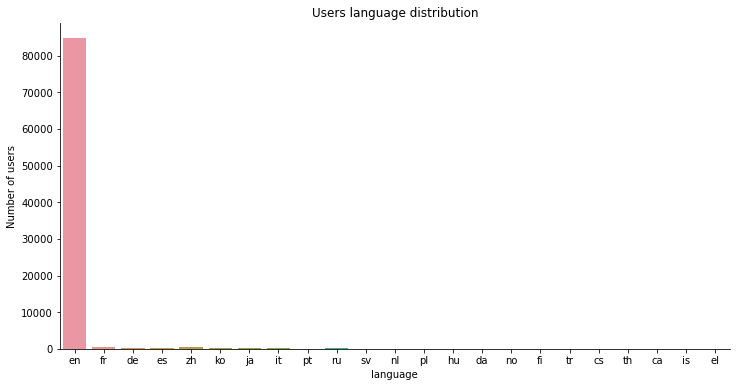

In [88]:
import seaborn as sns

df_without_NDF = df[df['country_destination']!='NDF']
plt.figure(figsize=(12,6))
sns.countplot(x='language', data=df_without_NDF)
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('Users language distribution')
sns.despine()

In [99]:
# 즉 다른 나라의 언어는 영어면 장땡이다. 즉 다른 나라의 언어 변수가 크게 영향을 안끼칠거라는 생각이든다
# 언어 관련 변수의 영향력은 그렇게 크지 않을꺼 같다.

merge_c=merge_c.drop(['destination_language ','language'],axis=1)

In [105]:
#action_detail이 불분명 지웠다 
merge_c.loc[merge_c.action_detail=='-unknown-', 'action_detail'] = np.nan
merge_c.dropna(subset=['action_detail'],inplace=True)


In [106]:
merge_c

,id,device_type,secs_elapsed,action_detail,gender,age,affiliate_channel,affiliate_provider,first_affiliate_tracked,first_device_type,first_browser,country_destination,cat_duration,action_count,distance_km,destination_km2
112,xwxei6hdk4,iPhone,24,dashboard,FEMALE,32.0,seo,google,linked,iPad,Mobile Safari,US,S,7.0,0.0,9826675.0
113,xwxei6hdk4,iPhone,24,header_userpic,FEMALE,32.0,seo,google,linked,iPad,Mobile Safari,US,S,7.0,0.0,9826675.0
114,xwxei6hdk4,iPad Tablet,24,message_post,FEMALE,32.0,seo,google,linked,iPad,Mobile Safari,US,S,7.0,0.0,9826675.0
115,xwxei6hdk4,iPad Tablet,24,contact_host,FEMALE,32.0,seo,google,linked,iPad,Mobile Safari,US,S,7.0,0.0,9826675.0
116,xwxei6hdk4,iPad Tablet,24,contact_host,FEMALE,32.0,seo,google,linked,iPad,Mobile Safari,US,S,7.0,0.0,9826675.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378442,qbxza0xojf,Windows Desktop,24,p1,FEMALE,23.0,sem-brand,google,omg,Windows Desktop,IE,US,F,99.0,0.0,9826675.0
2378443,qbxza0xojf,Windows Desktop,24,view_search_results,FEMALE,23.0,sem-brand,google,omg,Windows Desktop,IE,US,F,99.0,0.0,9826675.0
2378444,qbxza0xojf,Windows Desktop,24,header_userpic,FEMALE,23.0,sem-brand,google,omg,Windows Desktop,IE,US,F,99.0,0.0,9826675.0
2378445,qbxza0xojf,Windows Desktop,24,wishlist_content_update,FEMALE,23.0,sem-brand,google,omg,Windows Desktop,IE,US,F,99.0,0.0,9826675.0


In [108]:
#PCA 를 위해 더미 데이터 생성 
target=merge_c['cat_duration'].values
action_d=merge_c[['action_detail']]
merge_c=merge_c.drop(['action_detail','id'],axis=1)


In [109]:
merge_c=merge_c.drop(['cat_duration'],axis=1)

In [111]:
merge_c=merge_c.drop(['country_destination'],axis=1)

In [113]:
merge_c.columns

Index(['device_type', 'secs_elapsed', 'gender', 'age', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'first_device_type',
       'first_browser', 'action_count', 'distance_km', 'destination_km2'],
      dtype='object')

In [114]:
catvar=['device_type', 'gender', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'first_device_type', 'first_browser']
for c in catvar:
    temp=pd.get_dummies(merge_c[c],prefix=c, drop_first=True)
    merge_c=pd.concat((merge_c,temp),axis=1)
    
merge_c=merge_c.drop(catvar,axis=1)

In [115]:
merge_c

,secs_elapsed,age,action_count,distance_km,destination_km2,device_type_Android App Unknown Phone/Tablet,device_type_Android Phone,device_type_Blackberry,device_type_Chromebook,device_type_Linux Desktop,...,first_browser_Mobile Safari,first_browser_Opera,first_browser_Opera Mini,first_browser_RockMelt,first_browser_Safari,first_browser_Silk,first_browser_SiteKiosk,first_browser_Sogou Explorer,first_browser_TenFourFox,first_browser_TheWorld Browser
112,24,32.0,7.0,0.0,9826675.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
113,24,32.0,7.0,0.0,9826675.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
114,24,32.0,7.0,0.0,9826675.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
115,24,32.0,7.0,0.0,9826675.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
116,24,32.0,7.0,0.0,9826675.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378442,24,23.0,99.0,0.0,9826675.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2378443,24,23.0,99.0,0.0,9826675.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2378444,24,23.0,99.0,0.0,9826675.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2378445,24,23.0,99.0,0.0,9826675.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
import statsmodels.api as sm

#변수 선택법
def processSubset(x,y, feature_set):
    model = sm.OLS(y,x[list(feature_set)])  #modeling
    regr = model.fit()  #모델학습
    AIC = regr.aic    #모델의 AIC
    return {"model" : regr , "AIC" : AIC}

#모든 조합을 다 조합해서 좋은 모델을 반환시키는 알고리즘
import time
import itertools
 
def getBest(x,y,k):
    tic = time.time()  #시작시간
    results = []       #결과저장공간
    for combo in itertools.combinations(x.columns.difference(['const']),k): 
        combo=(list(combo)+['const'])
        #각 변수조합을 고려한 경우의 수
        results.append(processSubset(x,y,feature_set=combo))#모델링된 것들을 저장
    models=pd.DataFrame(results) #데이터 프레임으로 변환
    #가장 낮은 AIC를 가지는 모델 선택 및 저장
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time() #종료시간
    print("Processed",models.shape[0],"models on",k,"predictors in",(toc-tic),
          "seconds.")
    return  bestModel
 
#print(getBest(x=trainX,y=trainY,k=2))
 
#변수 선택에 따른 학습시간과 저장 K 반복
 
 
models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(merge_c,target,i)
 
#toc = time.time()
#print("Total elapsed time : ",(toc-tic),"seconds")
 
#print(models)
 
#전진 선택법(Step=1)
 
def forward(x,y,predictors):
    remainingPredictors = [p for p in x.columns.difference(['const'])
                           if p not in predictors]
    tic=time.time()
    results=[]
    for p in remainingPredictors:
        results.append(processSubset(x=x,y=y,feature_set=predictors+[p]+['const']))
    #데이터프레임으로 변환
    models = pd.DataFrame(results)
 
    #AIC가 가장 낮은 것을 선택
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time()
    print("Processed ", models.shape[0],"models on", len(predictors)+1,
          "predictors in",(toc-tic))
    print("Selected predictors:",bestModel['model'].model.exog_names,
          'AIC : ',bestModel[0])
    return bestModel

 
#후진제거법
 
def backward(x,y,predictors):
    tic = time.time()
    results=[]
    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,list(combo)+['const']))
    models = pd.DataFrame(results)
    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed",models.shape[0],"models on",len(predictors)-1,
          "predictors in",(toc - tic))
    print("Selected predictors :",bestModel['model'].model.exog_names,
          ' AIC:',bestModel[0])
    return bestModel

def Stepwise_model(x,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x,y,predictors+['const'])['AIC']
    
    for i in range(1, len(x.columns.difference(['const']))+1):
        forwardResult = forward(x,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        backwordResult = backward(x,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != 'const']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])
 
stepwiseBestModel = Stepwise_model(merge_c,target)

KeyError: "['const'] not in index"

In [ ]:
stepwiseBestModel.summary()